In [1]:
!pip install tensorflow matplotlib numpy

     -------------------------------------- 331.8/331.8 MB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 8.1/8.1 MB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 13.1/13.1 MB 5.3 MB/s eta 0:00:00
     -------------------------------------- 135.8/135.8 kB 8.4 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     ---------------------------------------- 26.4/26.4 MB 6.1 MB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 kB 3.9 MB/s eta 0:00:00
     -------------------------------------- 436.9/436.9 kB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 64.7/64.7 kB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 60.3/60.3 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 7.0 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5


[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# problem statement 3 Build Feedforward neural networks with Keras and TensorFlow for classification of
# CIFAR10 image dataset using the following steps:
# a. Import the necessary packages
# b. Load the training and testing data
# c. Define the network architecture using Keras
# d. Train the model using SGD/Adam optimizer
# e. Evaluate the network
# f. Plot the training loss and accuracy

TensorFlow version: 2.20.0
Loading CIFAR-10 dataset...
Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Data preprocessing completed!

Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)


Starting training...
Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.3175 - loss: 1.8909 - val_accuracy: 0.3486 - val_loss: 1.7779
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.3949 - loss: 1.6812 - val_accuracy: 0.4108 - val_loss: 1.6455
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4235 - loss: 1.6022 - val_accuracy: 0.4460 - val_loss: 1.5433
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4483 - loss: 1.5393 - val_accuracy: 0.4521 - val_loss: 1.5440
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4632 - loss: 1.4971 - val_accuracy: 0.4624 - val_loss: 1.5032
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4771 - loss: 1.4592 - val_accuracy: 0.4634 - val_loss: 1.4994
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4884 - loss: 1.4276 - val_accuracy: 0.4771 - val_loss: 1.4762
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5007 - l

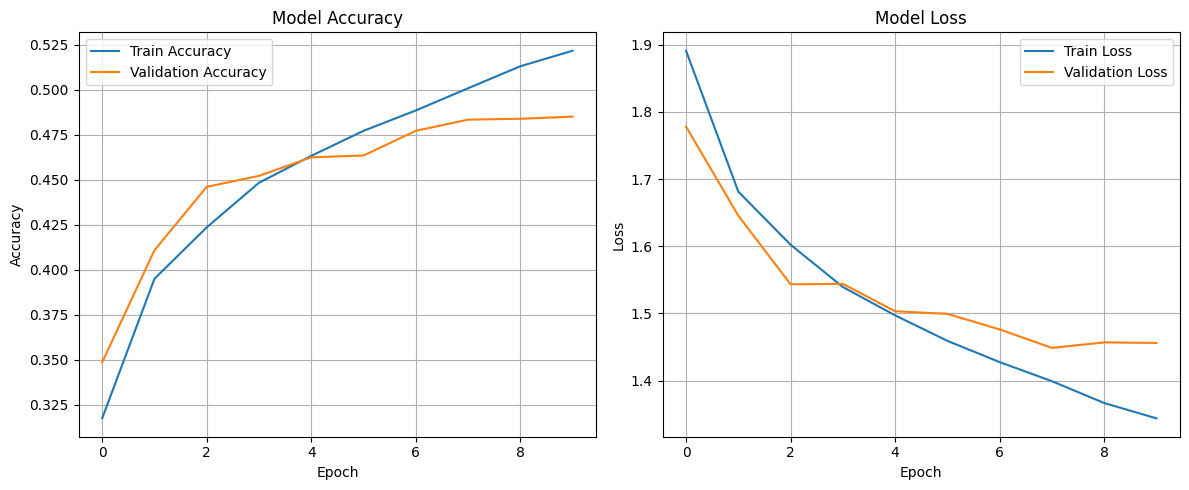

In [1]:
#loading from a dataset with keres
# ============================================================
# CIFAR-10 Classification using Feedforward Neural Network (FNN)
# ============================================================

# Step a: Import the necessary packages
import tensorflow as tf
from tensorflow.keras import datasets, models, layers, utils
import matplotlib.pyplot as plt
import numpy as np

print(f"TensorFlow version: {tf.__version__}")

# For reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# ------------------------------------------------------------
# Step b: Load the training and testing data
# ------------------------------------------------------------
print("Loading CIFAR-10 dataset...")
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

# Normalize pixel values (0–255 → 0–1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten images (32x32x3 → 3072)
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))

# One-hot encode the labels
y_train_cat = utils.to_categorical(y_train, 10)
y_test_cat = utils.to_categorical(y_test, 10)

print("Data preprocessing completed!")

# ------------------------------------------------------------
# Step c: Define the network architecture using Keras
# ------------------------------------------------------------
model = models.Sequential([
    layers.Input(shape=(3072,)),             # Flattened input
    layers.Dense(512, activation='relu'),    # Hidden layer 1
    layers.Dense(256, activation='relu'),    # Hidden layer 2
    layers.Dense(128, activation='relu'),    # Hidden layer 3
    layers.Dense(10, activation='softmax')   # Output layer
])

# Model summary
print("\nModel Architecture:")
model.summary()

# ------------------------------------------------------------
# Step d: Compile and train the model
# ------------------------------------------------------------
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

print("\nStarting training...")
# Train the model
history = model.fit(
    x_train_flat, y_train_cat,
    validation_data=(x_test_flat, y_test_cat),
    epochs=10,  # Reduced for faster execution
    batch_size=128,
    verbose=1
)

# ------------------------------------------------------------
# Step e: Evaluate the network
# ------------------------------------------------------------
test_loss, test_acc = model.evaluate(x_test_flat, y_test_cat, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")
print(f"✅ Test Loss: {test_loss:.4f}")

# ------------------------------------------------------------
# Step f: Plot the training loss and accuracy
# ------------------------------------------------------------
plt.figure(figsize=(12,5))

# Plot Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
#loading dataset from csv file code 
# ============================================================
# CIFAR-10 Classification using Feedforward Neural Network (FNN)
# ============================================================

# Step a: Import the necessary packages
import tensorflow as tf
from tensorflow.keras import models, layers, utils
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os

print(f"TensorFlow version: {tf.__version__}")

# For reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# ------------------------------------------------------------
# Step b: Load the training and testing data from CSV files
# ------------------------------------------------------------

def load_data_from_csv(train_csv_path, test_csv_path=None, label_column='label', image_shape=(32, 32, 3)):
    """
    Load image data from CSV files
    
    Parameters:
    - train_csv_path: Path to training CSV file
    - test_csv_path: Path to testing CSV file (optional)
    - label_column: Name of the label column
    - image_shape: Original image shape (height, width, channels)
    """
    
    print(f"Loading training data from: {train_csv_path}")
    train_df = pd.read_csv(train_csv_path)
    
    # Separate features and labels
    if label_column in train_df.columns:
        y_train = train_df[label_column].values
        x_train = train_df.drop(columns=[label_column]).values
    else:
        # If no label column specified, assume last column is label
        y_train = train_df.iloc[:, -1].values
        x_train = train_df.iloc[:, :-1].values
    
    if test_csv_path and os.path.exists(test_csv_path):
        print(f"Loading testing data from: {test_csv_path}")
        test_df = pd.read_csv(test_csv_path)
        
        if label_column in test_df.columns:
            y_test = test_df[label_column].values
            x_test = test_df.drop(columns=[label_column]).values
        else:
            y_test = test_df.iloc[:, -1].values
            x_test = test_df.iloc[:, :-1].values
    else:
        print("No test file provided, splitting training data...")
        x_train, x_test, y_train, y_test = train_test_split(
            x_train, y_train, test_size=0.2, random_state=42, stratify=y_train
        )
    
    # Reshape data back to image format if needed
    # For CIFAR-10: 32x32x3 = 3072 pixels
    if x_train.shape[1] == np.prod(image_shape):
        x_train = x_train.reshape((-1,) + image_shape)
        x_test = x_test.reshape((-1,) + image_shape)
    
    return (x_train, y_train), (x_test, y_test)

# Example usage - Choose one method:

# Method 1: Load from actual CSV files
try:
    # Replace these paths with your actual CSV file paths
    train_csv_path = "cifar10_train.csv"  # Your training CSV file
    test_csv_path = "cifar10_test.csv"    # Your testing CSV file
    
    (x_train, y_train), (x_test, y_test) = load_data_from_csv(
        train_csv_path=train_csv_path,
        test_csv_path=test_csv_path,
        label_column='label',  # Change to your label column name
        image_shape=(32, 32, 3)
    )
    
except FileNotFoundError:
    print("CSV files not found. Using built-in CIFAR-10 dataset as fallback...")
    from tensorflow.keras import datasets
    (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)

# Normalize pixel values (0–255 → 0–1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten images (32x32x3 → 3072)
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))

# One-hot encode the labels
num_classes = 10  # Change this based on your dataset
y_train_cat = utils.to_categorical(y_train, num_classes)
y_test_cat = utils.to_categorical(y_test, num_classes)

print("Data preprocessing completed!")
print(f"Flattened training data shape: {x_train_flat.shape}")
print(f"One-hot labels shape: {y_train_cat.shape}")

# ------------------------------------------------------------
# Step c: Define the network architecture using Keras
# ------------------------------------------------------------
input_shape = x_train_flat.shape[1]  # 3072 for CIFAR-10

model = models.Sequential([
    layers.Input(shape=(input_shape,)),      # Flattened input
    layers.Dense(512, activation='relu'),    # Hidden layer 1
    layers.Dense(256, activation='relu'),    # Hidden layer 2
    layers.Dense(128, activation='relu'),    # Hidden layer 3
    layers.Dense(num_classes, activation='softmax')   # Output layer
])

# Model summary
print("\nModel Architecture:")
model.summary()

# ------------------------------------------------------------
# Step d: Compile and train the model
# ------------------------------------------------------------
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

print("\nStarting training...")
# Train the model
history = model.fit(
    x_train_flat, y_train_cat,
    validation_data=(x_test_flat, y_test_cat),
    epochs=10,  # Reduced for faster execution
    batch_size=128,
    verbose=1
)

# ------------------------------------------------------------
# Step e: Evaluate the network
# ------------------------------------------------------------
test_loss, test_acc = model.evaluate(x_test_flat, y_test_cat, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")
print(f"✅ Test Loss: {test_loss:.4f}")

# ------------------------------------------------------------
# Step f: Plot the training loss and accuracy
# ------------------------------------------------------------
plt.figure(figsize=(12,5))

# Plot Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()